In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns;sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


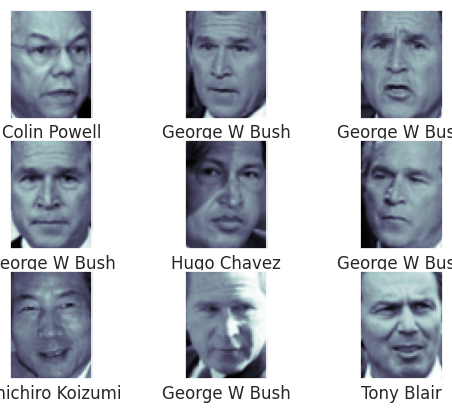

In [3]:
fig,ax=plt.subplots(3,3)
for i,axi in enumerate(ax.flat):
     axi.imshow(faces.images[i],cmap='bone')
     axi.set(xticks=[],yticks=[],
            xlabel=faces.target_names[faces.target[i ]] )


In [4]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)


In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

In [6]:
model.fit(Xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [7]:
yfit=model.predict(Xtest)

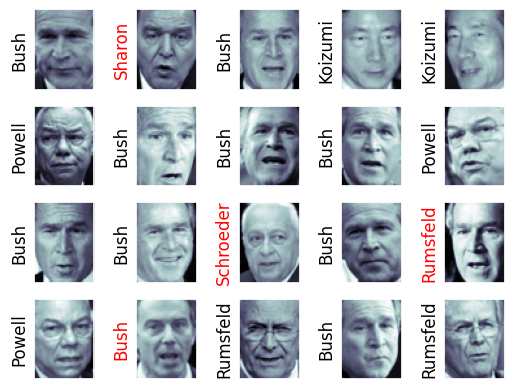

In [8]:
fig,ax=plt.subplots(4,5)
for i,axi in enumerate(ax.flat):
     axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
     axi.set(xticks=[],yticks=[])
     axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                    color="black" if yfit[i]==ytest[i] else 'red')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))
cm=confusion_matrix(ytest,yfit)
print(cm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.61      0.73      0.67        15
     Colin Powell       0.88      0.87      0.87        68
  Donald Rumsfeld       0.80      0.65      0.71        31
    George W Bush       0.85      0.87      0.86       126
Gerhard Schroeder       0.64      0.78      0.71        23
      Hugo Chavez       0.92      0.60      0.73        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.86      0.84        42

         accuracy                           0.82       337
        macro avg       0.80      0.79      0.79       337
     weighted avg       0.83      0.82      0.82       337

[[ 11   0   2   1   1   0   0   0]
 [  1  59   1   5   0   0   0   2]
 [  1   3  20   5   0   0   0   2]
 [  2   5   2 109   4   1   1   2]
 [  2   0   0   1  18   0   1   1]
 [  0   0   0   2   5  12   0   1]
 [  0   0   0   0   0   0  12   0]
 [  1   0   0   5   0   0   0  36]]
